## Morphological operations

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Lenna_g.jpg',0)
print(img.shape)
plt.imshow(img)
plt.show()  


(512, 512)


<Figure size 640x480 with 1 Axes>

(512, 512)


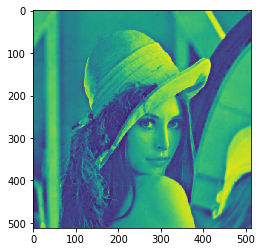

In [2]:
## Erosion (A-B)
    
W = int(img.shape[0])
H = int(img.shape[1])


element = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])


eroImg = np.zeros((W,H), dtype=np.uint8)

for i in range(1,W-1):
    for j in range(1,H-1):
        eroImg[i, j] = abs(np.min(img[i-1:i+2 , j-1:j+2 ] - element))

print(eroImg.shape)

cv2.imwrite('EroLenna.jpg', eroImg)
plt.imshow(eroImg)
plt.show()        


(512, 512)


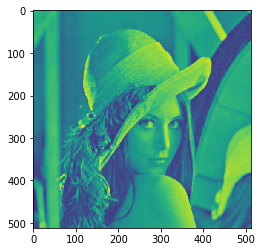

In [3]:
## Dilation (A+B)
    
W = int(img.shape[0])
H = int(img.shape[1])


element = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])


dilaImg = np.zeros((W,H), dtype=np.uint8)

for i in range(1,W-1):
    for j in range(1,H-1):
        dilaImg[i, j] = abs(np.max(img[i-1:i+2 , j-1:j+2 ] + element))

print(dilaImg.shape)

cv2.imwrite('DilaLenna.jpg', dilaImg)
plt.imshow(dilaImg)
plt.show()  

(512, 512)


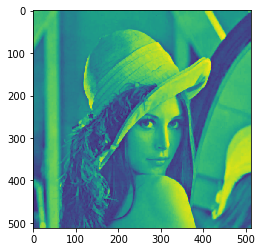

In [4]:
# Opening :  (A-B)+B

E_img = cv2.imread('EroLenna.jpg',0)

W = int(E_img.shape[0])
H = int(E_img.shape[1])


element = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])

Op_img = np.zeros((W,H), dtype = np.uint8)

for i in range(1,W-1):
    for j in range(1,H-1):
        Op_img[i,j] = abs(np.max(E_img[i-1:i+2 , j-1:j+2] + element))

print(Op_img.shape)
cv2.imwrite('OpenLenna.jpg', Op_img)
plt.imshow(Op_img)
plt.show()

(512, 512)


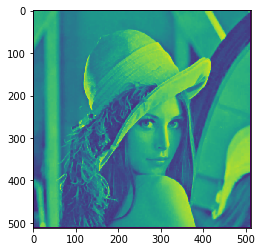

In [8]:
# Closing :  (A+B)-B

D_img = cv2.imread('DilaLenna.jpg',0)

W = int(E_img.shape[0])
H = int(E_img.shape[1])


element = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])

Cl_img = np.zeros((W,H), dtype = np.uint8)

for i in range(1,W-1):
    for j in range(1,H-1):
        Cl_img[i,j] = abs(np.min(D_img[i-1:i+2 , j-1:j+2] - element))

        
print(Cl_img.shape)
cv2.imwrite('CloseLenna.jpg', Cl_img)
plt.imshow(Cl_img)
plt.show()

### Morphological Smoothing

(512, 512)
(516, 516)


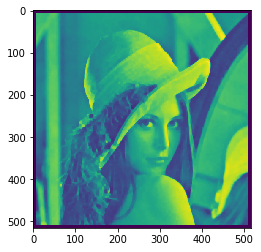

In [5]:
## Perform a morphological opening followed by a closing
## (((A-B)+B)+B)-B 

OP_Img = cv2.imread('OpenLenna.jpg',0)  # 做過Opening的image

W = int(OP_Img.shape[0])
H = int(OP_Img.shape[1])


element5 = np.array([[1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1]])

element3 = np.array([[1,1,1],
                     [1,1,1],
                     [1,1,1]])

D_OP_img = np.zeros((W,H), dtype = np.uint8)

##Dilation first
for i in range(2,W-4):
    for j in range(2,H-4):
        D_OP_img[i,j] = abs(np.max(OP_Img[i-2:i+3 , j-2:j+3] + element5))

# for i in range(1,W-1):
#     for j in range(1,H-1):
#         D_OP_img[i,j] = abs(np.max(OP_Img[i-1:i+2 , j-1:j+2] + element3))

print(D_OP_img.shape)
cv2.imwrite('Di_Opening.jpg', D_OP_img)

# Erosion
D_OP_img = cv2.imread('Di_Opening.jpg',0)  # 做過 Dilation 的 Opening image
K = int(D_OP_img.shape[0])
J = int(D_OP_img.shape[1])

MorSm_img = np.zeros((K,J), dtype = np.uint8)

for i in range(2,K-4):
    for j in range(2,J-4):
        MorSm_img[i,j] = abs(np.min(D_OP_img[i-2:i+3 , j-2:j+3] - element5))

# for i in range(1,K-1):
#     for j in range(1,J-1):
#         MorSm_img[i,j] = abs(np.min(D_OP_img[i-1:i+2 , j-1:j+2] - element3))  

MorSm_img = cv2.copyMakeBorder(MorSm_img,2,2,2,2,cv2.BORDER_REFLECT)

print(MorSm_img.shape)
cv2.imwrite('Mor_Smooth_Lenna.jpg', MorSm_img)
plt.imshow(MorSm_img)
plt.show()

### Morphological Gradient

C:\Users\sars8\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
C:\Users\sars8\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


(512, 512)


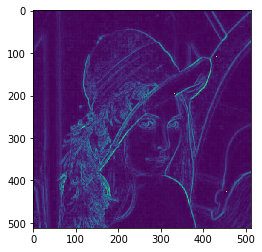

In [6]:
## Dilation image - Erosion image

D_img = cv2.imread('DilaLenna.jpg',0)
E_img = cv2.imread('EroLenna.jpg',0)

W = int(D_img.shape[0])
H = int(D_img.shape[1])

Mo_Graimg = np.zeros((W,H), dtype = np.uint8)

for i in range(W):
    for j in range(H):
        if int(D_img[i,j] - E_img[i,j])<0:
            Mo_Graimg[i,j] = 0
        else:
            Mo_Graimg[i,j] = int(D_img[i,j] - E_img[i,j])

print(Mo_Graimg.shape)
cv2.imwrite('Mor_Gradient_Lenna.jpg', Mo_Graimg)
plt.imshow(Mo_Graimg)
plt.show()            